In [1]:
import zipfile
import os

# Define the path to the zip file
zip_path = r'C:\Users\nnaya\Downloads\archive (8).zip'

# Define the extraction directory
extract_to = r'C:\Users\nnaya\Downloads\extracted_archive'

# Create the directory if it doesn't exist
os.makedirs(extract_to, exist_ok=True)

# Open and extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction complete!")


Extraction complete!


In [2]:
import pandas as pd
from pathlib import Path

# Correct path to the CSV file
csv_file = Path(r"C:\Users\nnaya\Downloads\extracted_archive\titanic.csv")

# Load the CSV
df = pd.read_csv(csv_file)

# Print preview and shape
print(df.head())          # First 5 rows
print(df.shape)           # (rows, columns)


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
(8

In [3]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [5]:
df['Age'] = df['Age'].fillna(df['Age'].mean())


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
object_cols = df.select_dtypes(include='object')
print("Object columns:")
print(object_cols.columns)


Object columns:
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [8]:
for col in object_cols.columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(dropna=False))



Column: Name
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64

Column: Sex
Sex
male      577
female    314
Name: count, dtype: int64

Column: Ticket
Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
S

In [9]:
print(df["Survived"].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


 Insight:
Only about 38% of the passengers survived.

This imbalance is important to keep in mind when training models — you may need to address class imbalance (

In [10]:
print(df['Survived'].dtype)


int64


this is a integer type data

In [11]:
print(df['Survived'].unique())


[0 1]


there is two unique value one is 0 which shows passengers are dead and 1 show passanger are available


In [12]:
print(df['Survived'].value_counts(normalize=True) * 100)


Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


it show 38% passenger are survived and 61 percentagge pasanage are dead in incident

In [13]:
print(df["Survived"].isnull().sum())

0


it shows there is no null value in survvied coloumn

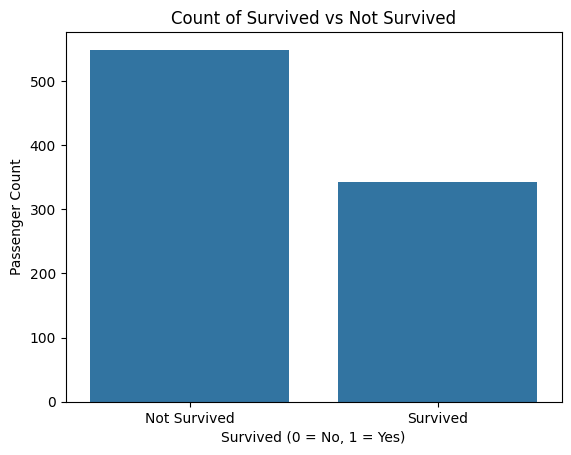

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=df)
plt.title('Count of Survived vs Not Survived')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Passenger Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()


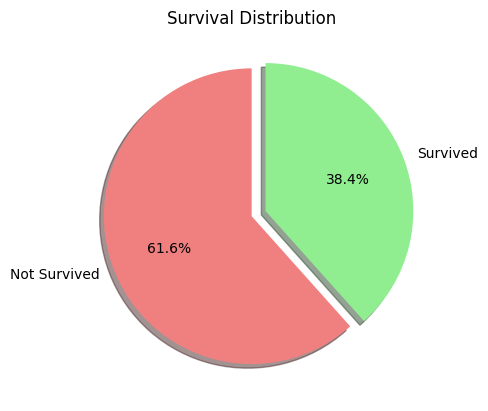

In [15]:
df['Survived'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    labels=['Not Survived', 'Survived'], 
    colors=['lightcoral', 'lightgreen'],
    startangle=90,
    explode=(0, 0.1),
    shadow=True
)
plt.title('Survival Distribution')
plt.ylabel('')
plt.show()


In [16]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
df["Pclass"].value_counts().sort_index()

Pclass
1    216
2    184
3    491
Name: count, dtype: int64

from hear we concluded that measuraty of class belongs to third class

In [18]:
df['Pclass'].describe()


count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

showing a skew toward the lower class population.

In [19]:
print(df['Pclass'].value_counts(normalize=True) * 100)


Pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64


it show most of passenger belongs to 3 and 2 class

In [20]:
print(df['Pclass'].dtype)


int64


In [21]:
print(df['Pclass'].unique())


[3 1 2]


In [22]:
print(df['Pclass'].isnull().sum())


0


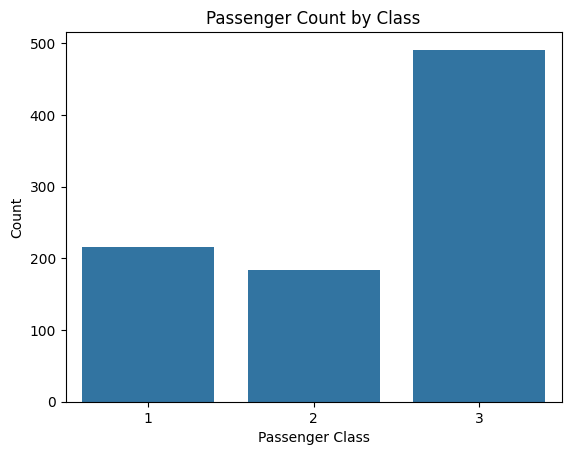

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Pclass', data=df)
plt.title('Passenger Count by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()


(np.float64(-1.099998369528562),
 np.float64(1.0999801730800205),
 np.float64(-1.0999996186752978),
 np.float64(1.0999999818416808))

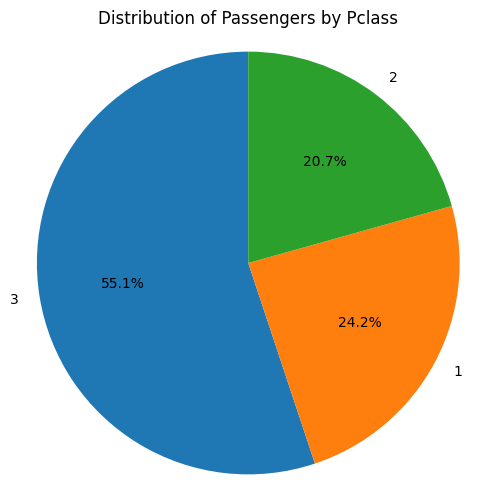

In [24]:
import matplotlib.pyplot as plt

# Count values of Pclass
pclass_counts = df['Pclass'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(pclass_counts, labels=pclass_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Passengers by Pclass')
plt.axis('equal')  # Equal aspect ratio ensure


In [25]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
print(df['Sex'].value_counts())


Sex
male      577
female    314
Name: count, dtype: int64


In [27]:
df['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

it is conclude that most of male is traveling on titanic

In [28]:
df['Sex'].isnull().sum()

np.int64(0)

there is no null value in sex

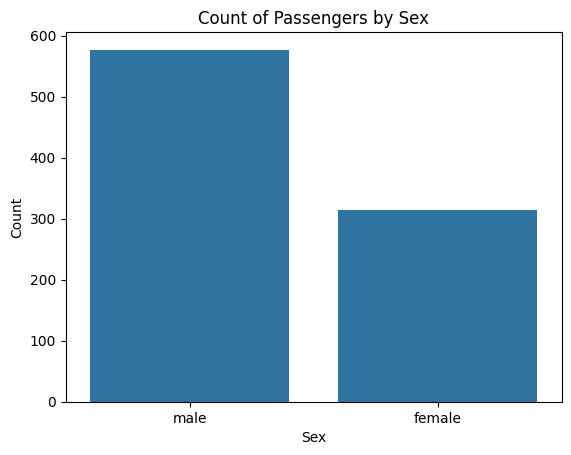

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart
sns.countplot(data=df, x='Sex')
plt.title('Count of Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


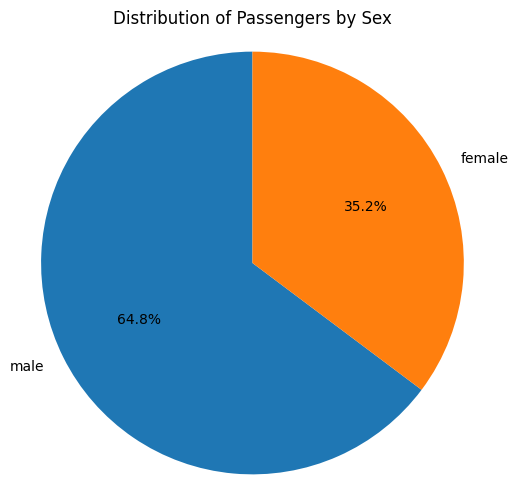

In [30]:
# Pie chart
sex_counts = df['Sex'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Passengers by Sex')
plt.axis('equal')  # Makes the pie a circle
plt.show()


In [31]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [32]:
print(df['Age'].describe())


count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64


In [33]:
# from this we concluded that more passangers are in between age 22-35


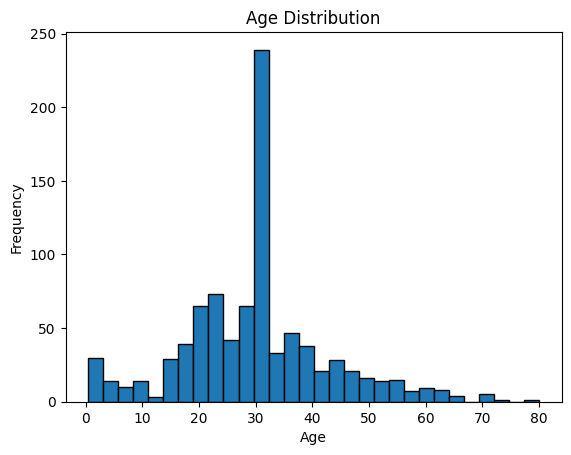

In [34]:
import matplotlib.pyplot as plt

plt.hist(df['Age'].dropna(), bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [35]:
# Unique values in Age column
unique_ages = df['Age'].unique()
print(unique_ages)


[22.         38.         26.         35.         29.69911765 54.
  2.         27.         14.          4.         58.         20.
 39.         55.         31.         34.         15.         28.
  8.         19.         40.         66.         42.         21.
 18.          3.          7.         49.         29.         65.
 28.5         5.         11.         45.         17.         32.
 16.         25.          0.83       30.         33.         23.
 24.         46.         59.         71.         37.         47.
 14.5        70.5        32.5        12.          9.         36.5
 51.         55.5        40.5        44.          1.         61.
 56.         50.         36.         45.5        20.5        62.
 41.         52.         63.         23.5         0.92       43.
 60.         10.         64.         13.         48.          0.75
 53.         57.         80.         70.         24.5         6.
  0.67       30.5         0.42       34.5        74.        ]


In [36]:
# Count of unique values in the Age column
unique_age_count = df['Age'].nunique()
print("Number of unique ages:", unique_age_count)


Number of unique ages: 89


In [37]:
# Define age bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50',
              '50-60', '60-70', '70-80', '80-90']

# Create a new column for binned age
df['AgeRange'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Count how many people fall into each age range
age_range_counts = df['AgeRange'].value_counts().sort_index()

# Display the result
print(age_range_counts)


AgeRange
0-10      62
10-20    102
20-30    397
30-40    167
40-50     89
50-60     48
60-70     19
70-80      6
80-90      1
Name: count, dtype: int64


from this it concluded that many of people is young

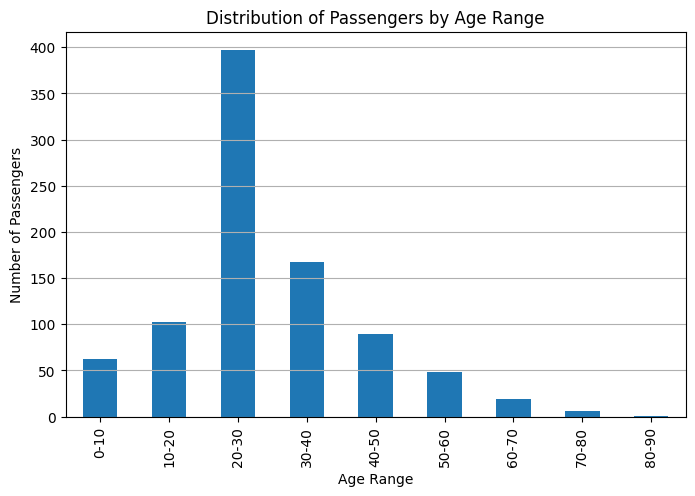

In [38]:
# Plotting age range distribution
age_range_counts.plot(kind='bar', figsize=(8, 5))
plt.title("Distribution of Passengers by Age Range")
plt.xlabel("Age Range")
plt.ylabel("Number of Passengers")
plt.grid(axis='y')
plt.show()


C:\Users\nnaya\AppData\Local\Temp\ipykernel_19920\1712494161.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'].dropna(), shade=True, color='blue')  # dropna() to remove NaN values


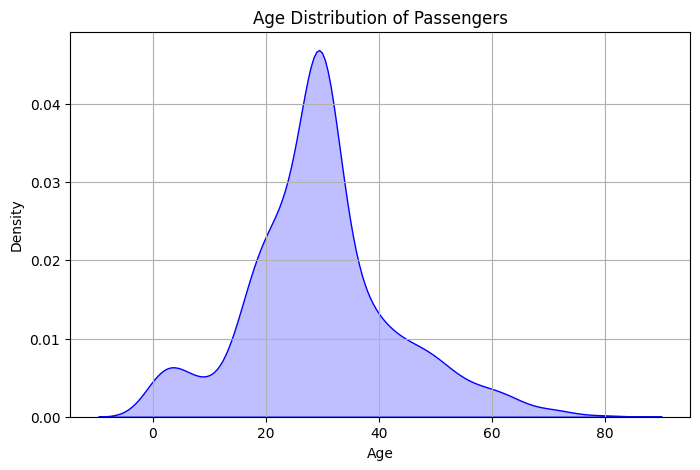

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of Age with KDE (line)
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Age'].dropna(), shade=True, color='blue')  # dropna() to remove NaN values
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [40]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeRange'],
      dtype='object')

In [41]:
print(df['SibSp'].value_counts())


SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


it shows most of the passanger had no siblings

C:\Users\nnaya\AppData\Local\Temp\ipykernel_19920\3122670683.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp', data=df, palette='Set2')


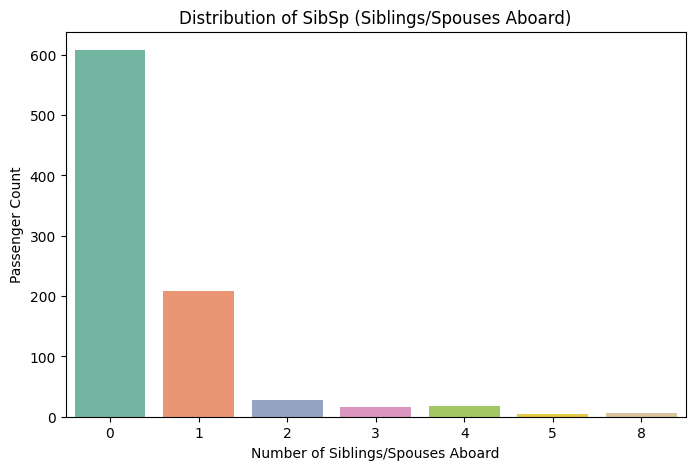

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x='SibSp', data=df, palette='Set2')
plt.title('Distribution of SibSp (Siblings/Spouses Aboard)')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Passenger Count')
plt.show()


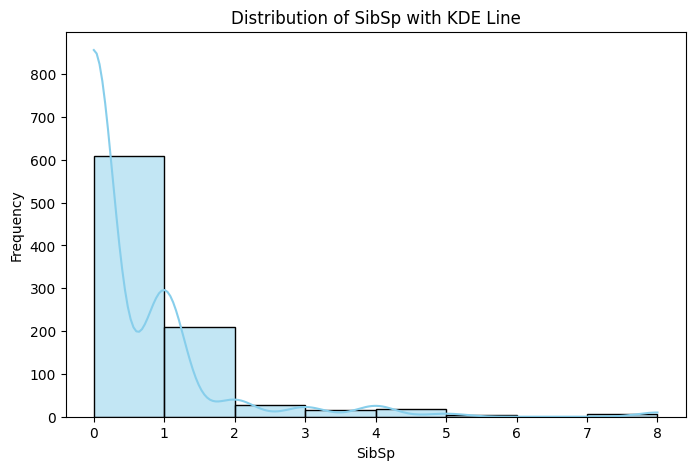

In [43]:
plt.figure(figsize=(8, 5))
sns.histplot(df['SibSp'], kde=True, bins=8, color='skyblue')
plt.title('Distribution of SibSp with KDE Line')
plt.xlabel('SibSp')
plt.ylabel('Frequency')
plt.show()


In [44]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeRange'],
      dtype='object')

In [45]:
df["Parch"].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    2
9    0
Name: Parch, dtype: int64

In [46]:
# Unique values in the Parch column
print(df['Parch'].unique())

# Also show the count of each unique value
print(df['Parch'].value_counts())


[0 1 2 5 3 4 6]
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


many people travel without family and some people travel with family

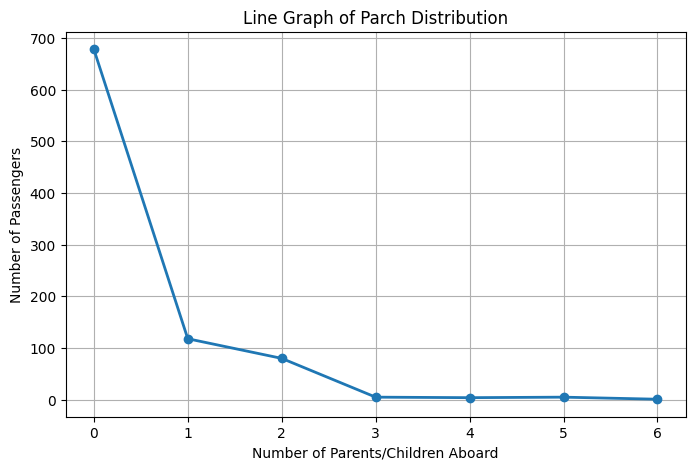

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
parch_counts = df['Parch'].value_counts().sort_index()

# Plot line graph
plt.figure(figsize=(8, 5))
plt.plot(parch_counts.index, parch_counts.values, marker='o', linestyle='-', linewidth=2)
plt.title('Line Graph of Parch Distribution')
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()


In [48]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeRange'],
      dtype='object')

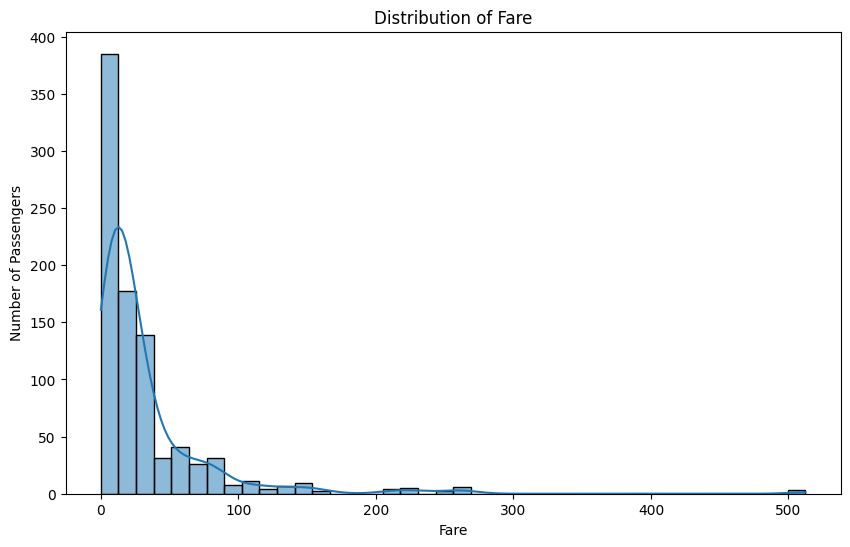

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], bins=40, kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.show()


In [50]:
fare_counts = df['Fare'].value_counts().sort_index()
print(fare_counts)


Fare
0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Name: count, Length: 248, dtype: int64


most of people travel in small amount of faer

In [51]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeRange'],
      dtype='object')

In [52]:
df['Cabin'].isnull().sum(), df['Cabin'].notnull().sum()


(np.int64(687), np.int64(204))

In [53]:
df['Cabin'].unique()


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

cabin has missing value

In [55]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeRange'],
      dtype='object')

In [57]:
df["Embarked"].head(10)

0    S
1    C
2    S
3    S
4    S
5    Q
6    S
7    S
8    S
9    C
Name: Embarked, dtype: object

In [58]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

from this we concluded that the ship is taking people from three places

In [59]:
df["Embarked"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Embarked
Non-Null Count  Dtype 
--------------  ----- 
889 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [61]:
df["Embarked"].isnull().sum()

np.int64(2)

In [63]:
df["Embarked"].count()

np.int64(889)

ther ia only two missing value 

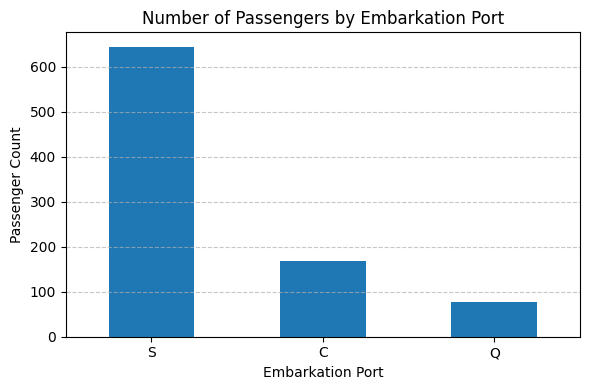

In [65]:

embarked_counts = df['Embarked'].value_counts()

# Plot bar graph
plt.figure(figsize=(6,4))
embarked_counts.plot(kind='bar')
plt.title('Number of Passengers by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Passenger Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

the most people come to ship from one place 

In [66]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeRange'],
      dtype='object')

In [67]:
df["AgeRange"].head()

0    20-30
1    30-40
2    20-30
3    30-40
4    30-40
Name: AgeRange, dtype: category
Categories (9, object): ['0-10' < '10-20' < '20-30' < '30-40' ... '50-60' < '60-70' < '70-80' < '80-90']

In [68]:
df["AgeRange"].count()

np.int64(891)

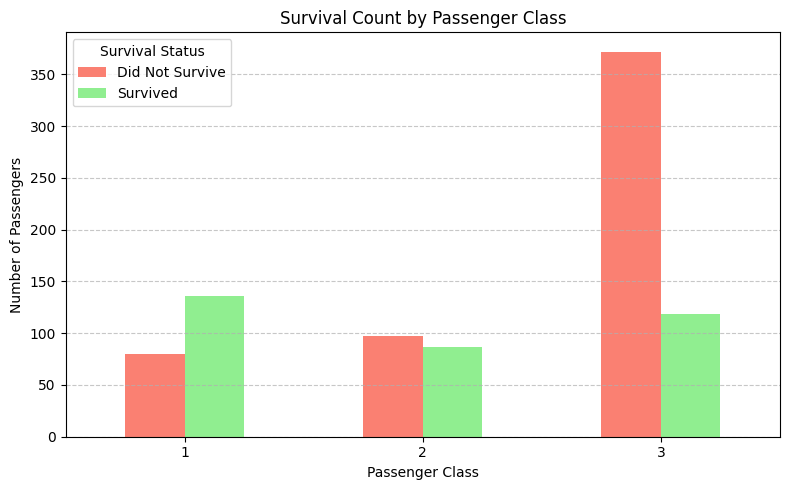

In [69]:
pclass_survival = df.groupby(['Pclass', 'Survived'])['PassengerId'].count().unstack()

# Rename columns for better readability
pclass_survival.columns = ['Did Not Survive', 'Survived']

# Plot grouped bar chart
pclass_survival.plot(kind='bar', figsize=(8,5), color=['salmon', 'lightgreen'])
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Survival Status')
plt.tight_layout()
plt.show()

from this we analysis that most people died form 3rd class and
in first clas and 2nd class less died in this incdent

C:\Users\nnaya\AppData\Local\Temp\ipykernel_19920\1714261606.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_class_survival = survived_df.groupby(['AgeRange', 'Pclass'])['PassengerId'].count().unstack(fill_value=0)


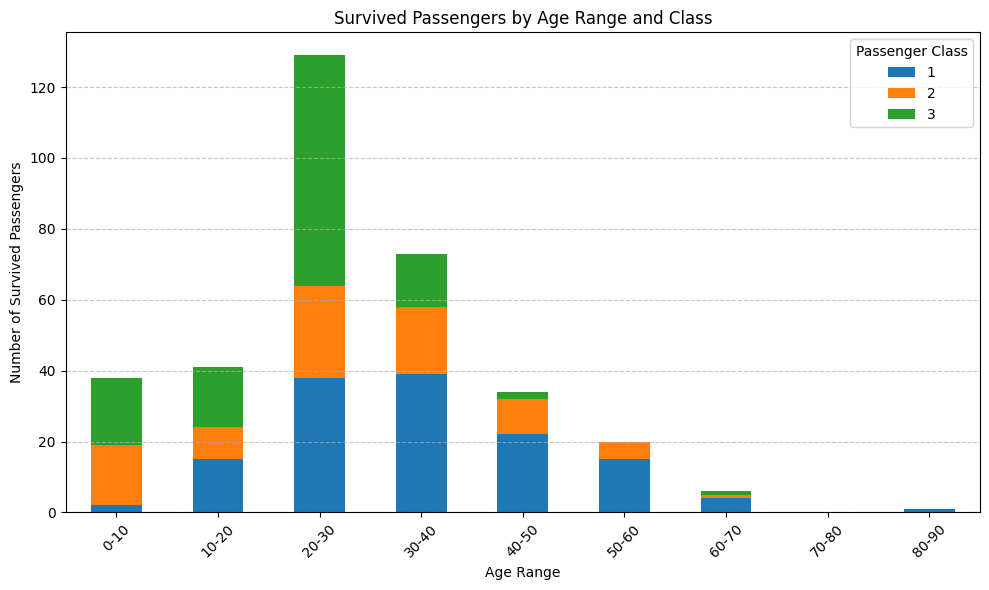

In [70]:
df = df.dropna(subset=['Age', 'Survived', 'Pclass'])

# Create AgeRange column if not already present
if 'AgeRange' not in df.columns:
    age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
    age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
    df['AgeRange'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Filter only survived passengers
survived_df = df[df['Survived'] == 1]

# Group by AgeRange and Pclass
age_class_survival = survived_df.groupby(['AgeRange', 'Pclass'])['PassengerId'].count().unstack(fill_value=0)

# Plot stacked bar chart
age_class_survival.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Survived Passengers by Age Range and Class')
plt.xlabel('Age Range')
plt.ylabel('Number of Survived Passengers')
plt.legend(title='Passenger Class')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

from this we concluded that most people not died in betwenn 20-30 and msot of them in third class

In [72]:
survival_counts = df['Survived'].value_counts()

# Print results
print("Survival Summary:")
print(f"🟥 Died (Survived = 0): {survival_counts[0]}")
print(f"🟩 Survived (Survived = 1): {survival_counts[1]}")

# Check which is greater
if survival_counts[1] > survival_counts[0]:
    print("\n✅ More people SURVIVED than died.")
elif survival_counts[1] < survival_counts[0]:
    print("\n❌ More people DIED than survived.")
else:
    print("\n⚖️ Equal number of survivors and deaths.")

Survival Summary:
🟥 Died (Survived = 0): 549
🟩 Survived (Survived = 1): 342

❌ More people DIED than survived.


In [73]:
# Drop rows with missing age or survival status
df = df.dropna(subset=['Age', 'Survived'])

# Filter passengers older than 60
over_60 = df[df['Age'] > 60]

# Count survived vs died
over_60_counts = over_60['Survived'].value_counts()

# Print results
print("Passengers over age 60:")
print(f"🟥 Died (Survived = 0): {over_60_counts.get(0, 0)}")
print(f"🟩 Survived (Survived = 1): {over_60_counts.get(1, 0)}")

# Compare
if over_60_counts.get(1, 0) > over_60_counts.get(0, 0):
    print("\n✅ More passengers over 60 SURVIVED.")
elif over_60_counts.get(1, 0) < over_60_counts.get(0, 0):
    print("\n❌ More passengers over 60 DIED.")
else:
    print("\n⚖️ Equal number of deaths and survivals for passengers over 60.")

Passengers over age 60:
🟥 Died (Survived = 0): 17
🟩 Survived (Survived = 1): 5

❌ More passengers over 60 DIED.


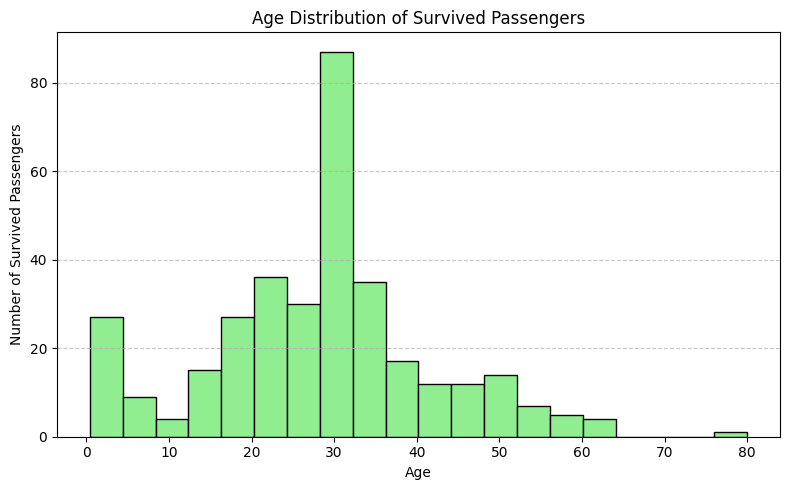

In [74]:
df = df.dropna(subset=['Age', 'Survived'])

# Filter only survived passengers
survived_df = df[df['Survived'] == 1]

# Plot histogram of ages of survived passengers
plt.figure(figsize=(8,5))
plt.hist(survived_df['Age'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Age Distribution of Survived Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Survived Passengers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

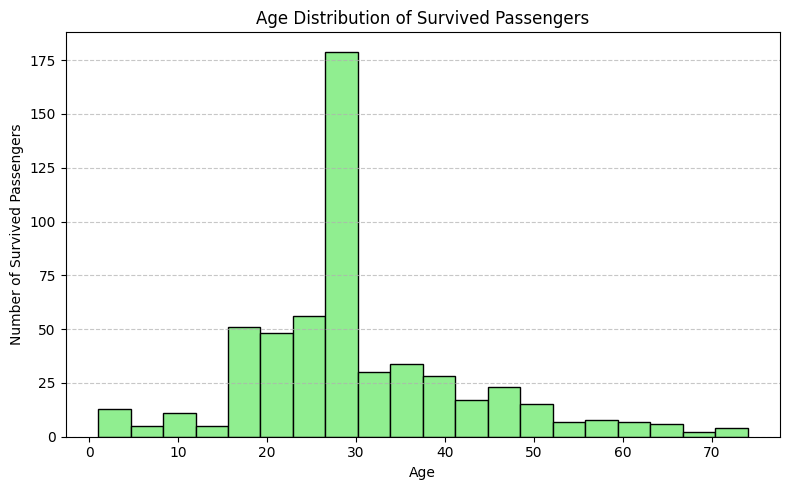

In [75]:
df = df.dropna(subset=['Age', 'Survived'])

# Filter only survived passengers
survived_df = df[df['Survived'] == 0]

# Plot histogram of ages of survived passengers
plt.figure(figsize=(8,5))
plt.hist(survived_df['Age'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Age Distribution of Survived Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Survived Passengers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

from above analysis tthat concluded msot of peole who died and survvied age range between 20-30 and travel in 3rd class that indicates theay are young and middel class people

In [76]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeRange'],
      dtype='object')

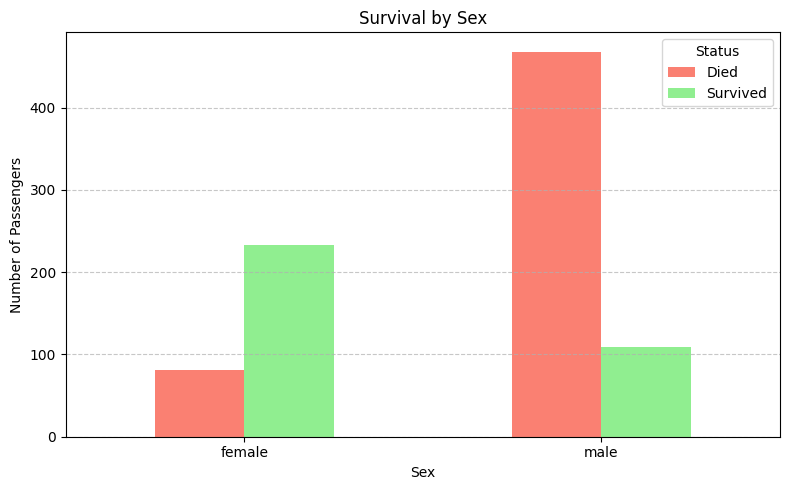

In [77]:
# Drop rows with missing values in Sex or Survived
df = df.dropna(subset=['Sex', 'Survived'])

# Group by Sex and Survived
sex_survival = df.groupby(['Sex', 'Survived'])['PassengerId'].count().unstack()

# Rename columns for clarity
sex_survival.columns = ['Died', 'Survived']

# Plot grouped bar chart
sex_survival.plot(kind='bar', figsize=(8,5), color=['salmon', 'lightgreen'])
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.legend(title='Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

its show that more male is died compare to female 

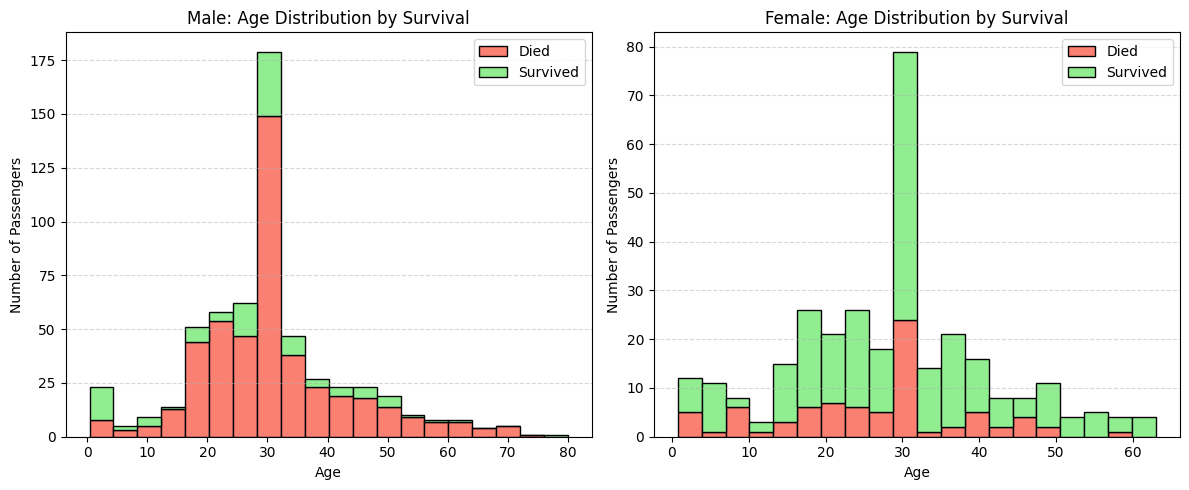

In [78]:

# Drop rows with missing Age, Sex, or Survived
df = df.dropna(subset=['Age', 'Sex', 'Survived'])

# Split data into male and female
male_df = df[df['Sex'] == 'male']
female_df = df[df['Sex'] == 'female']

# Create subplots
plt.figure(figsize=(12, 5))

# Plot for males
plt.subplot(1, 2, 1)
plt.hist([male_df[male_df['Survived'] == 0]['Age'],
          male_df[male_df['Survived'] == 1]['Age']],
         bins=20,
         stacked=True,
         color=['salmon', 'lightgreen'],
         label=['Died', 'Survived'],
         edgecolor='black')
plt.title('Male: Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Plot for females
plt.subplot(1, 2, 2)
plt.hist([female_df[female_df['Survived'] == 0]['Age'],
          female_df[female_df['Survived'] == 1]['Age']],
         bins=20,
         stacked=True,
         color=['salmon', 'lightgreen'],
         label=['Died', 'Survived'],
         edgecolor='black')
plt.title('Female: Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

it show that very less men survived then female 

In [79]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeRange'],
      dtype='object')

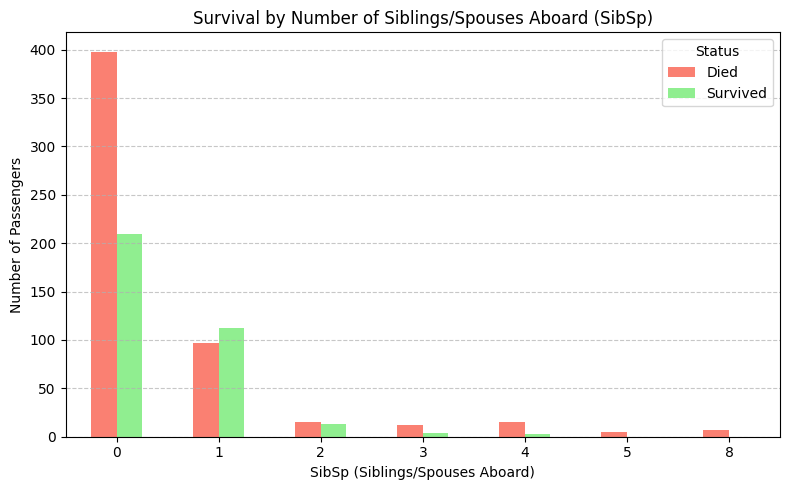

In [80]:
# Drop rows with missing values in SibSp or Survived
df = df.dropna(subset=['SibSp', 'Survived'])

# Group by SibSp and Survived, then count
sibsp_survival = df.groupby(['SibSp', 'Survived'])['PassengerId'].count().unstack(fill_value=0)

# Rename columns for clarity
sibsp_survival.columns = ['Died', 'Survived']

# Plot grouped bar chart
sibsp_survival.plot(kind='bar', figsize=(8,5), color=['salmon', 'lightgreen'])
plt.title('Survival by Number of Siblings/Spouses Aboard (SibSp)')
plt.xlabel('SibSp (Siblings/Spouses Aboard)')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.legend(title='Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

it show big family people died all

In [82]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeRange'],
      dtype='object')

Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeRange this anlysis is not required because its conclude that manly more people from 3rd class age beteween 20-30 and specially male is not survived in this tragedy